In [1]:
from functions import *
import math
import numpy as np
import torch as t
from torch import tensor
import scipy.constants as con
import matplotlib.pyplot as plt
import torch.linalg as ln
import scipy
import scipy.stats as stats
from mpl_toolkits import mplot3d
import variables as vr
from classes import *
from random import random






"""

The following code initializes the model with rubidium, certain transitions, some laserbeams, and a collision rule.

"""


#Rubidium Data
rubidium=species(
    con.atomic_mass*86.909180520,
    #defining energy levels should be expandable, need to dynamically assign energy levels (in terms of transitions and/or in terms of levels?)
    {
        "S12F1":0,
        "S12F2":4.5283e-24,
        "P12F0":2.54593588e-19,
        "P12F1":2.54593636e-19,
        "P12F2":2.545937398e-19,
        "P12F3":2.54593917e-19
    },
    87,
    1.5
)
    
    

#defining the transitions we care about (NEEDS to be declared before generating particles,
# transitions cared about tells which levels to generate for the particles)
rubidium.D2cooling=Transition(38.11e6,"S12F2","P12F3",rubidium)
rubidium.D2repump=Transition(38.11e6,"S12F1","P12F2",rubidium)
rubidium.D2offres=Transition(38.11e6,"S12F2","P12F2",rubidium)
rubidium.createstructure()


#defining cooling lasers
Int=100
Cooling1=laserbeam(0,[1,0,0],780e-9,cgaussianprofile(Int,0.01,0.02, vr.def_device),Cutoff=0.02)
Cooling2=laserbeam(0,[-1,0,0],780e-9,cgaussianprofile(Int,0.01,0.02, vr.def_device),Cutoff=0.02)
Cooling3=laserbeam(0,[0,1,0],780e-9,cgaussianprofile(Int,0.01,0.02, vr.def_device),Cutoff=0.02)
Cooling4=laserbeam(0,[0,-1,0],780e-9,cgaussianprofile(Int,0.01,0.02, vr.def_device),Cutoff=0.02)
Cooling5=laserbeam(0,[0,0,1],780e-9,cgaussianprofile(Int,0.01,0.02, vr.def_device),Cutoff=0.02)
Cooling6=laserbeam(0,[0,0,-1],780e-9,cgaussianprofile(Int,0.01,0.02, vr.def_device),Cutoff=0.02)
Laserbeams=[Cooling1,Cooling2,Cooling3,Cooling4,Cooling5,Cooling6]




#need to sort out how to assign `rules` modularly, for now the following rule will create a pyramid which will do.
def rule(x,def_device=vr.def_device):
    x,y,z=x[:,0],x[:,1],x[:,2]
    A=t.max(abs(x),abs(y))-z-0.1*t.ones(x.shape[0],device=def_device)
    A+=t.abs(A)
    A=t.ceil(A)
    A=(A==t.zeros(A.shape[0],device=A.device))
    #if given a tensor of positions, will return a tensor of bools for whether the rule is followed or not.
    return A



In [6]:


#code demonstrating the retrieval of intensity from a laserbeam for given particle positions
positions=(1-2*t.zeros((10000,3)).uniform_())*0.1
I=Cooling1.intensity(positions)
print(t.max(I))


tensor(99.2776)


In [8]:
particles.createbyT(100,rubidium)
particles.x.device

device(type='cpu')

torch.Size([2050602, 3])
tensor([[ -40.4167,  -50.3121, -178.8942],
        [ 133.6955,    8.0202,   39.8975],
        [-384.1819,  210.6763,  159.5188],
        ...,
        [ -65.8249, -351.1278,  143.5646],
        [ -28.5659,   37.6137, -250.3172],
        [-419.2326, -164.5417,  -83.7303]], dtype=torch.float64)


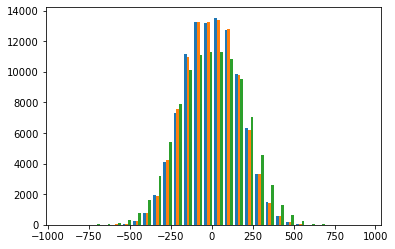

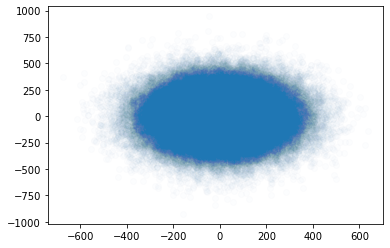

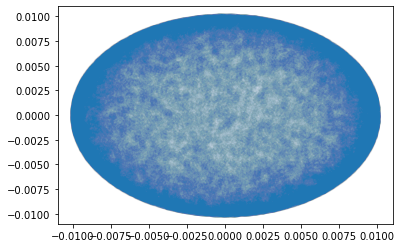

In [2]:
particles.createbyT(100,rubidium)
particles.timestepadd(rubidium,dt=0.0001)
print(particles.x.shape)

particles.createbyT(100000,rubidium)
print(particles.v)
plt.hist(particles.v.T,30)
plt.show()
plt.scatter(particles.v[:,1],particles.v[:,2],alpha=0.01)
plt.show()
plt.scatter(particles.x[:,1],particles.x[:,2],alpha=0.01)

#demonstrator code, showing the capacity of the particles class to generate new particles and their velocities/positions.


In [6]:
x=[]
x.append('A')
